# Study the discrepancy between estimated posterior and hellinger distance
## There seemed to be a weird behavior observable in certain cases of simulation prediction, which showed fluctuating hellinger distance while its corresponding mean estimated posterior seemed more or less steady. In this notebook, such discrepancy is studied

In [1]:
# changing cwd
%cd ..

c:\Users\jongm\Desktop\temp_workspace\Python\JOVO\induced_bias_exp


## Load packages

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.patches import Circle

cmap = 'PRGn'

In [3]:
from src.inductive_bias import IB
ib = IB() #instantiate inductive bias package

[ c:\Users\jongm\Desktop\temp_workspace\Python\JOVO\induced_bias_exp\clf\SimulationData.pickle ] loaded
[ c:\Users\jongm\Desktop\temp_workspace\Python\JOVO\induced_bias_exp\clf\PosteriorData.pickle ] loaded
[ c:\Users\jongm\Desktop\temp_workspace\Python\JOVO\induced_bias_exp\clf\TrainedCLF.pickle ] loaded
[ c:\Users\jongm\Desktop\temp_workspace\Python\JOVO\induced_bias_exp\clf\EstimatedData.pickle ] loaded
[ c:\Users\jongm\Desktop\temp_workspace\Python\JOVO\induced_bias_exp\clf\HellingerData.pickle ] loaded
Size of the S-XOR: (6322,)                    
Size of the Spiral: (6276,)                    
Size of the whole dataset: (12598, 7)

Size of the S-XOR after adding hellinger: (6322, 8)            
Size of the Spiral after adding hellinger: (6276, 8)


## Time and Date of the experiment

In [4]:
print(ib.date)

2021-04-07 01:06:40.512996


## In order to investigate this phenomenone, such behavior was simulated as below

In [5]:
# create simulation data
z = np.arange(0,10,1)
a = np.arange(0,1.0,0.1)
b = np.arange(1.0,0,-0.1)
c = (a + b)/2
d = np.ones(10)
e = ib._hellinger_explicit(a, d)
f = ib._hellinger_explicit(b, d)
g = (e + f)/2

In [6]:
# concatenate each series into a whole data frame
h = pd.DataFrame([z,a,b,c,d,e,f,g]).T
h.columns = ['Index', 'X1', 'X2', 'Mean', 'True', 'H1', 'H2', 'Mean-H']
h

,Index,X1,X2,Mean,True,H1,H2,Mean-H
0,0.0,0.0,1.0,0.5,1.0,0.707107,0.000000,0.353553
1,1.0,0.1,0.9,0.5,1.0,0.483500,0.036286,0.259893
2,2.0,0.2,0.8,0.5,1.0,0.390879,0.074651,0.232765
3,3.0,0.3,0.7,0.5,1.0,0.319808,0.115499,0.217654
4,4.0,0.4,0.6,0.5,1.0,0.259893,0.159384,0.209639
5,5.0,0.5,0.5,0.5,1.0,0.207107,0.207107,0.207107
6,6.0,0.6,0.4,0.5,1.0,0.159384,0.259893,0.209639
7,7.0,0.7,0.3,0.5,1.0,0.115499,0.319808,0.217654
8,8.0,0.8,0.2,0.5,1.0,0.074651,0.390879,0.232765
9,9.0,0.9,0.1,0.5,1.0,0.036286,0.483500,0.259893


In [7]:
# vectorize X1 and X2 based on its corresponding index
i = h.iloc[:,:3].melt('Index')[['Index', 'value']]
i

,Index,value
0,0.0,0.0
1,1.0,0.1
2,2.0,0.2
3,3.0,0.3
4,4.0,0.4
5,5.0,0.5
6,6.0,0.6
7,7.0,0.7
8,8.0,0.8
9,9.0,0.9


## Depending on the distribution, we can see that hellinger distance changes even when the sample parameter (ie mean) is constant

<AxesSubplot:xlabel='Index', ylabel='value'>

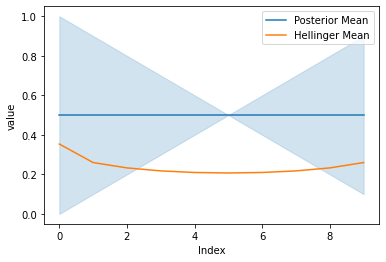

In [8]:
sns.lineplot(data=i, x='Index',y='value', label='Posterior Mean')
sns.lineplot(data=h, x='Index',y='Mean-H', label='Hellinger Mean')

## As a next step to compare this finding, the actual data were explored by studying the distribution of estimate and true posterior and hellinger distance.

## Define global variables

In [9]:
uX = ib.mask
uX0, uX1 = uX[:,0], uX[:,1]
label = ib.mtype[:3] + ['Human'] #excluding QDA
fsize= 18

## Compute radial distance of model estimate, true posterior, and human estimate

In [10]:
#human estimate for spiral
hmask = np.column_stack([ib.human[0][:,3], ib.human[0][:,5]])
temp1 = ib.get_radialDist(np.column_stack([hmask, ib.human[0][:,0]]).astype(float)) 

#human estimate for S-XOR
hmask = np.column_stack([ib.human[1][:,3], ib.human[1][:,5]])
temp2 = ib.get_radialDist(np.column_stack([hmask, ib.human[1][:,0]]).astype(float)) 

#estimated posterior for spiral
temp3 = ib.get_radialDist(np.column_stack([ib.mask, ib.estpst[1][2][0]])) 

#true posterior for spiral
temp4 = ib.get_radialDist(np.column_stack([ib.mask, ib.truepst[1][2][2]])) 

## Visualize the selected data currently being studied

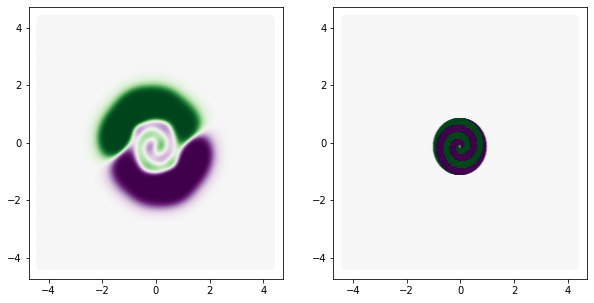

In [11]:
fig, axs= plt.subplots(1,2,figsize=(5*2,5))

axs[0].scatter(ib.mask[:,0],ib.mask[:,1],c=ib.estpst[1][2][0], cmap='PRGn')
axs[1].scatter(ib.mask[:,0],ib.mask[:,1],c=ib.truepst[1][2][2], cmap='PRGn')

## Studying predictions by ML models trained on `spiral` simulation dataset
### First row corresponds to the distribution of the predictions where the second row is their line plots

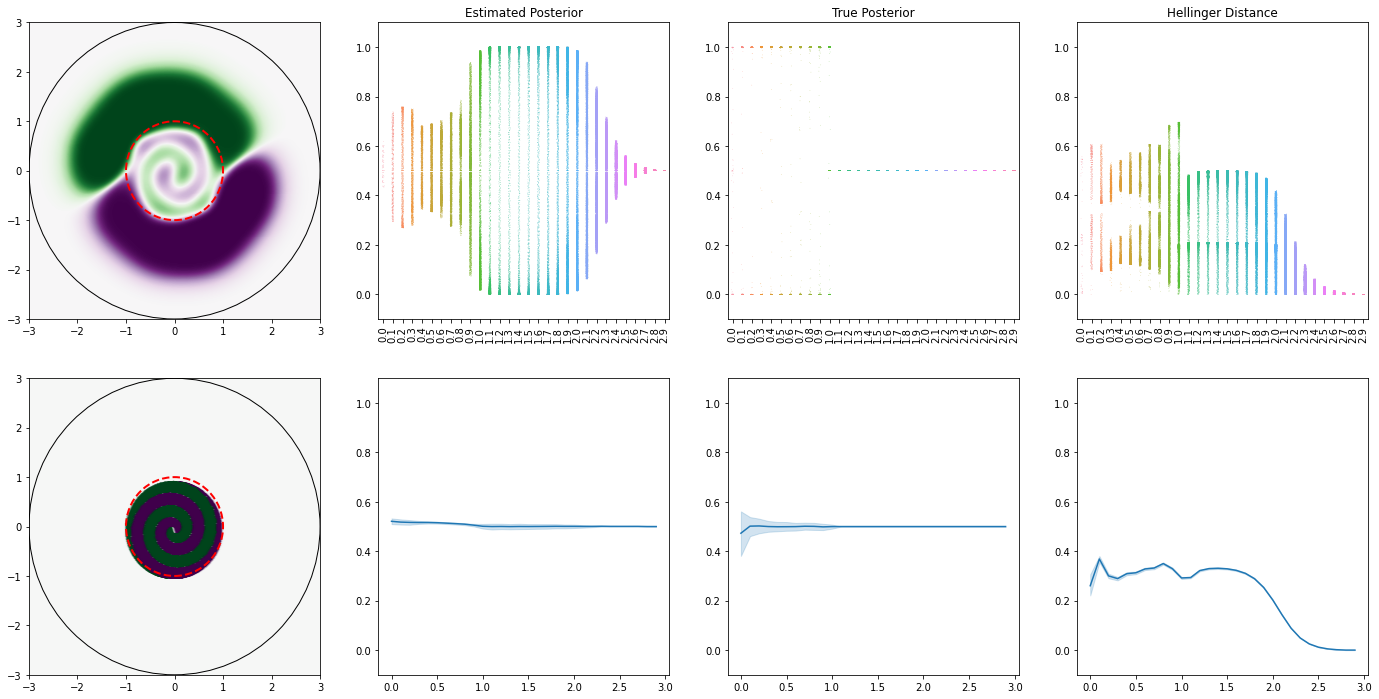

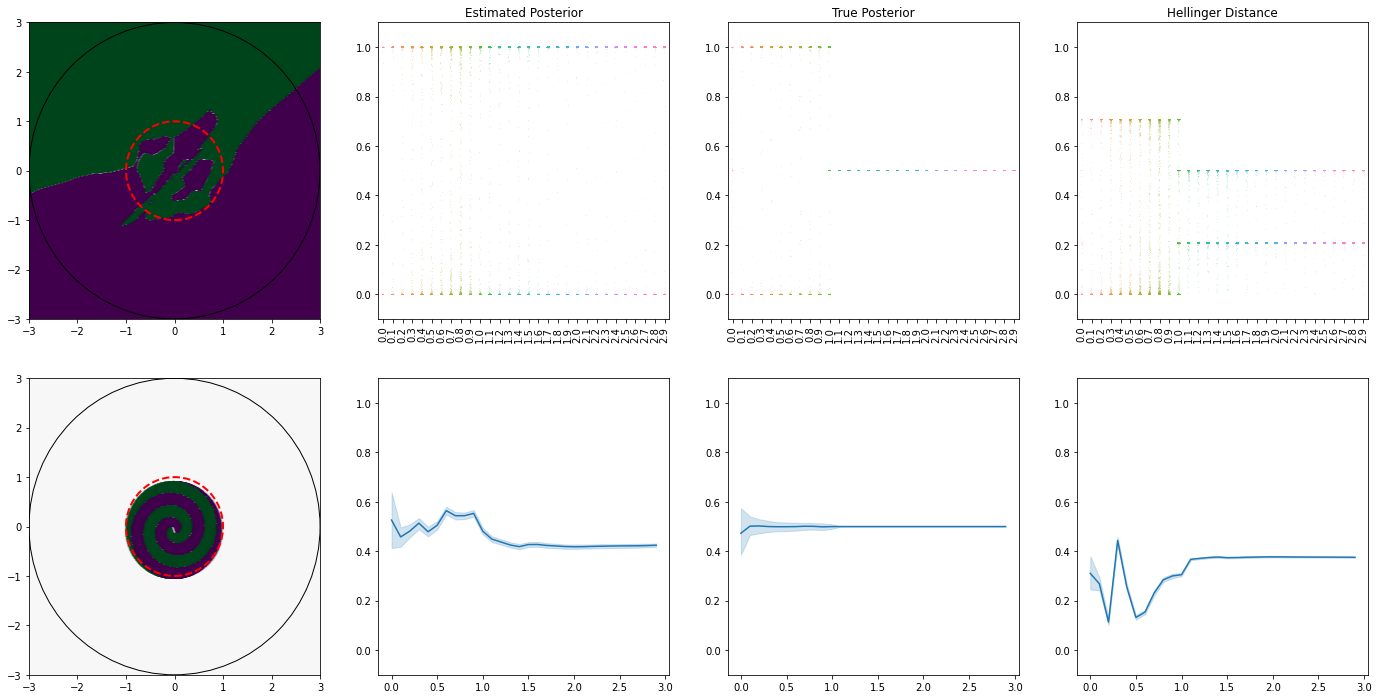

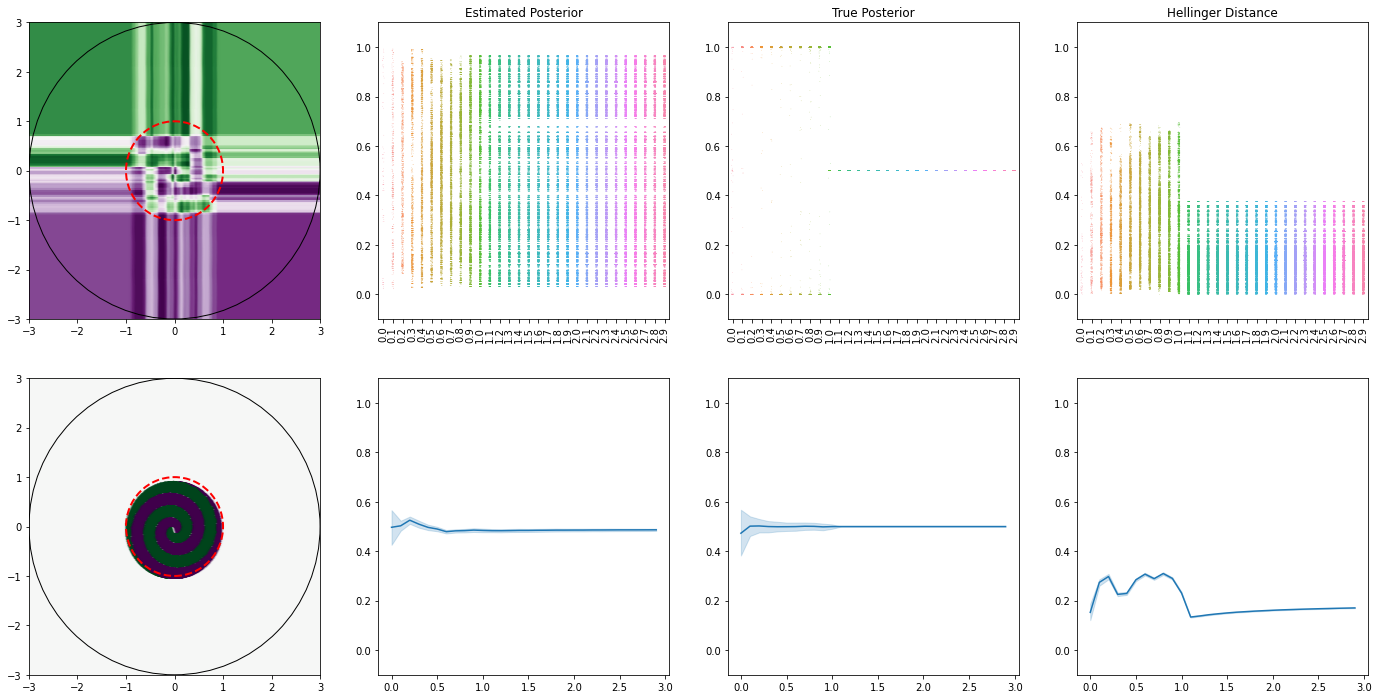

In [12]:
for j in range(3):
    temp3 = ib.get_radialDist(np.column_stack([ib.mask, ib.estpst[1][2][j]]))
    temp4 = ib.get_radialDist(np.column_stack([ib.mask, ib.truepst[1][2][2]]))
    temp5 = pd.DataFrame()
    temp6 = pd.DataFrame()
    temp7 = pd.DataFrame()

    for i in range(30):
        tt = pd.DataFrame(ib._hellinger_explicit(temp3[1][i],temp4[1][i])).dropna().reset_index(drop=True)
        ttt = pd.concat([pd.DataFrame([temp3[0][i]]*tt.shape[0]), tt], axis=1)
        temp5 = pd.concat([temp5, ttt],axis=0)

        ttt3 = pd.concat([pd.DataFrame([temp3[0][i]]*tt.shape[0]), pd.DataFrame(temp3[1][i])], axis=1)
        temp6 = pd.concat([temp6, ttt3],axis=0)

        ttt3 = pd.concat([pd.DataFrame([temp4[0][i]]*tt.shape[0]), pd.DataFrame(temp4[1][i])], axis=1)
        temp7 = pd.concat([temp7, ttt3],axis=0)

    temp5.columns=['a','b'] #hellinger
    temp6.columns=['a','b'] #estimate
    temp7.columns=['a','b'] #true

    temp8 = pd.concat([temp5,temp6['b']], axis=1)#.groupby('a')
    temp8 = pd.concat([temp8,temp7['b']], axis=1)#.groupby('a')
    temp8.columns=['a','b','c','d']

    ##### PLOT #####

    fig, axs= plt.subplots(2,4,figsize=(8*3,6*2), sharey=False)

    axs[0,0].scatter(c=ib.estpst[1][2][j],x=ib.mask[:,0],y=ib.mask[:,1], cmap='PRGn')
    axs[1,0].scatter(c=ib.truepst[1][2][2],x=ib.mask[:,0],y=ib.mask[:,1], cmap='PRGn')

    circle = Circle((0, 0), 3, linewidth=1, edgecolor='k', facecolor='none')
    axs[0,0].add_patch(circle)
    axs[0,0].add_patch(Circle((0, 0), radius=1, linewidth=2, ls='--', edgecolor='r', fill=False))
    circle = Circle((0, 0), 3, linewidth=1, edgecolor='k', facecolor='none')
    axs[1,0].add_patch(circle)
    axs[1,0].add_patch(Circle((0, 0), radius=1, linewidth=2, ls='--', edgecolor='r', fill=False))

    axs[0,0].set_xlim([-3,3])
    axs[0,0].set_ylim([-3,3])
    axs[1,0].set_xlim([-3,3])
    axs[1,0].set_ylim([-3,3])

    g = sns.stripplot(data=temp8,x='a',y='c',s=0.5,ax=axs[0,1])
    g.set_xticklabels(temp8['a'].unique().round(1), rotation=90);
    g.set_title('Estimated Posterior')
    g.set_xlabel('')
    g.set_ylabel('')
    g.set_ylim([-0.1,1.1])
    h = sns.lineplot(data=temp8, x='a',y='c',ax=axs[1,1], ci=95)
    h.set_xlabel('')
    h.set_ylabel('')
    h.set_ylim([-0.1,1.1])

    g = sns.stripplot(data=temp8,x='a',y='d',s=0.5,ax=axs[0,2])
    g.set_xticklabels(temp8['a'].unique().round(1), rotation=90);
    g.set_title('True Posterior')
    g.set_xlabel('')
    g.set_ylabel('')
    g.set_ylim([-0.1,1.1])
    h = sns.lineplot(data=temp8, x='a',y='d',ax=axs[1,2], ci=95)
    h.set_xlabel('')
    h.set_ylabel('')
    h.set_ylim([-0.1,1.1])

    g = sns.stripplot(data=temp8,x='a',y='b',s=0.5,ax=axs[0,3])
    g.set_xticklabels(temp8['a'].unique().round(1), rotation=90);
    g.set_title('Hellinger Distance')
    g.set_xlabel('')
    g.set_ylabel('')
    g.set_ylim([-0.1,1.1])
    h = sns.lineplot(data=temp8, x='a',y='b',ax=axs[1,3], ci=95)
    h.set_xlabel('')
    h.set_ylabel('')
    h.set_ylim([-0.1,1.1])

    plt.savefig(f'figs/[20210406_posterior_hellinger_discrepancy_study]_distribution_plot_{ib.mtype[j]}_{str(ib.date.date())}.png', bbox_inches='tight')